In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
ptr = pd.read_csv('dataset.csv')


In [3]:

df = pd.DataFrame({ 'x': ptr['sepal.length'],'y': ptr['sepal.width'],'cluster' : ptr['variety']})

In [4]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
80,5.5,2.4,2
81,5.5,2.4,2
82,5.8,2.7,2
83,6.0,2.7,2


In [5]:
centroids = {} ##create centorid
for i in range(3):
    arr= []
    arr.append(df.loc[df['cluster'] == i]['x'].mean())
    arr.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = arr

In [6]:
centroids

{0: [5.025925925925925, 3.4592592592592593],
 1: [5.246428571428571, 3.307142857142857],
 2: [5.933333333333333, 2.7433333333333336]}

Text(0, 0.5, 'y')

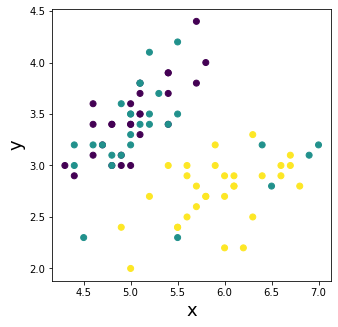

In [7]:
fig = plt.figure(figsize=(5, 5))##size of fig
plt.scatter(df['x'], df['y'], c=ptr['variety'])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)

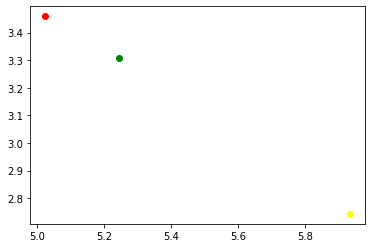

In [8]:
col = {0: 'red', 1: 'green', 2: 'yellow'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=col[i])
plt.show()

### Showing complete graph


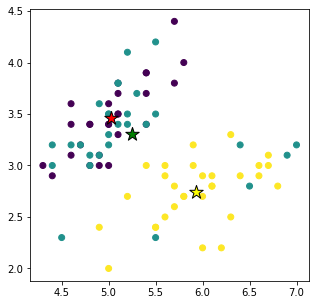

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=ptr['variety'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=col[i],marker='*',s=200, edgecolor='black')
plt.show()

In [10]:
def assignment(df, centroids):##calculate distance
    ##sqrt((x1-c)^2+(x2-c)^2)
    for i in range(3):
        df['distance_from_{}'.format(i)] = (np.sqrt((df['x'] - centroids[i][0]) ** 2+ (df['y'] - centroids[i][1]) ** 2) )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))##lamba is used to find closest value
    df['color'] = df['closest'].map(lambda x: col[x])
    return df

In [11]:
df = assignment(df, centroids)

In [12]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.084539,0.242147,1.125606,0,red
1,4.9,3.0,0,0.476210,0.462979,1.064733,1,green
2,4.7,3.2,0,0.416465,0.556834,1.315164,0,red
3,4.6,3.1,0,0.557207,0.678806,1.380213,0,red
4,5.0,3.6,0,0.143109,0.382743,1.266882,0,red
...,...,...,...,...,...,...,...,...
80,5.5,2.4,2,1.160507,0.941916,0.552861,2,yellow
81,5.5,2.4,2,1.160507,0.941916,0.552861,2,yellow
82,5.8,2.7,2,1.084281,0.821623,0.140198,2,yellow
83,6.0,2.7,2,1.235028,0.967725,0.079512,2,yellow


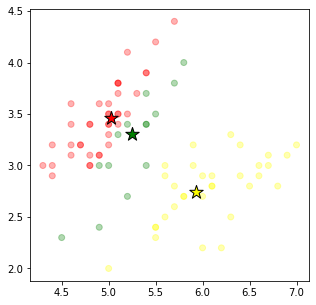

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=col[i],marker='*',s=200, edgecolor='black')

plt.show()

### Update function : Updating the centroids

In [14]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [15]:
centroids = update(centroids)
centroids

{0: [4.933333333333333, 3.451282051282051],
 1: [5.242857142857143, 3.207142857142857],
 2: [6.0874999999999995, 2.775000000000001]}

In [16]:
df = assignment(df, centroids)

### Visualising the updated graph

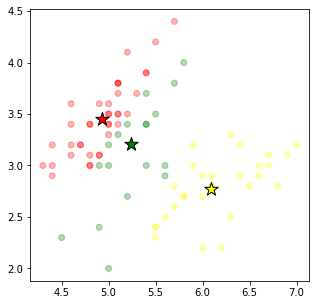

In [17]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=col[i],marker='*',s=200, edgecolor='black')
plt.show()

## Continuing until all assigned clusters don't change any more

In [18]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

# Final Result :

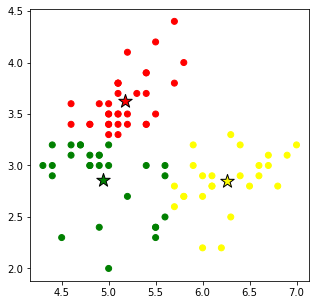

In [20]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=col[i],marker='*',s=200, edgecolor='black')

plt.show()